In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
import pandas as pd

import glob

%matplotlib inline
import mplsettings

from datetime import timedelta

print("numpy version  : ", np.__version__)
print("pandas version : ", pd.__version__)
print("xarray version : ", xr.__version__)

numpy version  :  1.26.4
pandas version :  2.2.3
xarray version :  2025.3.1


In [8]:
dirstix = "../../common/static_ttf"
#dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'STIX Two Text'

In [9]:
dataset4p0  = xr.open_mfdataset('thetaoga_CM4p0.nc')
datasetp125 = xr.open_mfdataset('thetaoga_CM4Xp125.nc')
datasetp25  = xr.open_mfdataset('thetaoga_CM4Xp25.nc')

In [10]:
thetaoga_4p0  = dataset4p0['thetaoga_CM4p0']
thetaoga_p125 = datasetp125['thetaoga_p125']
thetaoga_p25  = datasetp25['thetaoga_p25']

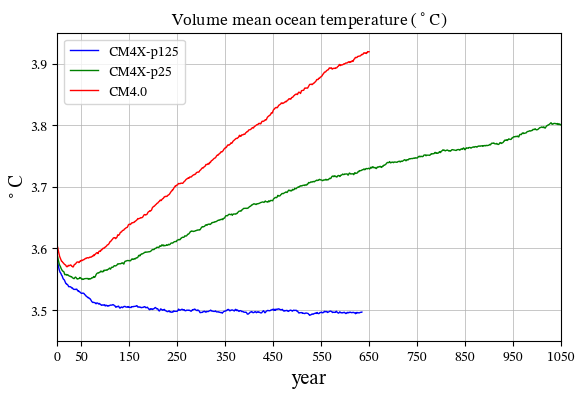

In [11]:
fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(6.5,4.0))

thetaoga_p125.plot.line(ax=axis, label='CM4X-p125',linestyle='solid', color='blue', linewidth=1) 
thetaoga_p25.plot.line(ax=axis, label='CM4X-p25',linestyle='solid', color='green', linewidth=1) 
thetaoga_4p0.plot.line(ax=axis, label='CM4.0',linestyle='solid', color='red', linewidth=1) 

axis.legend(loc='upper left')
axis.set_ylim([3.45,3.95])
#axis.set_ylim([3.5,3.52])
axis.set_xlim(0,900)
#axis.set_xlim(100,150)

axis.set_xlabel('year', fontsize=14)
axis.set_ylabel(r'$^\circ$C',fontsize=14, labelpad=1)

axis.grid(linewidth=.5)

plt.xticks(ticks=[0, 50, 150, 250, 350, 450, 550, 650, 750, 850, 950, 1050])
#plt.xticks(ticks=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1050])
#plt.xticks(ticks=[0, 50, 100, 150, 200])

plt.vlines(x=-5.5e4,ymin=3.5,ymax=3.6, color= 'purple', linestyle='solid')
plt.vlines(x=3.7e3,ymin=3.5,ymax=3.8, color= 'purple', linestyle='solid')
axis.set_title(r'Volume mean ocean temperature ($^\circ$C)')
fig.savefig('Fig07_thetaoga_piControl_CM4X.jpg', bbox_inches='tight', dpi=400, format='jpeg')
